# <img style="float: left; padding-right: 30px; width: 225px" src="media/UC.png">  IMT2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
__**Integrantes:**__ Christian Camilo | Ignacio Moya | Simon Poblete | Tomás Romero | Benjamín Ruiz

# <h1><center>AVES DE CHILE</center></h1>

## 1.- Contexto y Motivación🦾
El proyecto se enfoca en analizar avistamientos de aves con el objetivo de comprender cómo eventos como la pandemia y los incendios forestales de 2017 han afectado estos avistamientos. La motivación surge de la importancia de entender la interacción entre la vida silvestre y eventos ambientales extremos, así como su interaccion con seres humanos.

## 2.- Preguntas objetivo❓
- ¿La frecuencia de avistamientos de aves, o la cantidad de especies vario con los incendios y pandemia, respecto a otros años?
- Si es asi, ¿Qué especies de aves se ven más afectadas?
- ¿Existe algún(os) tipo(s) de ave(s) que en base a estas problemáticas pueden estar en peligro de extinción?

## 3.- Datos🗒️
Para llevar a cabo este proyecto, aprovecharemos la API proporcionada por [eBird](https://documenter.getpostman.com/view/664302/S1ENwy59#5a1e27e9-128f-4ab5-80ad-88cd6de10026). Utilizamos esta interfaz para obtener datos sobre avistamientos de aves en territorio chileno desde 2015 hasta 2022, incluyendo información sobre la taxonomía de las aves y las ubicaciones específicas donde se realizaron los avistamientos. Además, disponemos de un conjunto de datos que contiene información sobre los incendios registrados en nuestro país. También contamos con un archivo SHP que proporciona información geoespacial sobre las distintas regiones de Chile.

## 4.- Librerías y carga de DF📚

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

pd.options.display.max_columns = None

In [11]:
# Aves y avistamientos
df_aves_15 = pd.read_csv("data/avistamientos/vis_2015.csv")
df_aves_16 = pd.read_csv("data/avistamientos/vis_2016.csv")
df_aves_17 = pd.read_csv("data/avistamientos/vis_2017.csv")
df_aves_18 = pd.read_csv("data/avistamientos/vis_2018.csv")
df_aves_19 = pd.read_csv("data/avistamientos/vis_2019.csv")
df_aves_20 = pd.read_csv("data/avistamientos/vis_2020.csv")
df_aves_21 = pd.read_csv("data/avistamientos/vis_2021.csv")
df_aves_22 = pd.read_csv("data/avistamientos/vis_2022.csv")

# Incendios forestales y daños, causas, ocurrencia
df_ocurrencia_incendios = pd.read_csv("data/ocurrencia_incendios/ocurrencia_incendios_region.csv")
df_causas_incendios = pd.read_csv("data/causas_incendios/causas_incendios.csv")
df_danos_superficie = pd.read_csv("data/danos_superficies_hectareas/danos_superficies_limpio.csv")
#df_incendios = pd.read_csv("data/incendios/incendios_filtrados.csv") omitimos por ignorancia

df_danos_comuna_2014_2015 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2014 - 2015).csv")
df_danos_comuna_2015_2016 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2015 - 2016).csv")
df_danos_comuna_2016_2017 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2016 - 2017).csv")
df_danos_comuna_2017_2018 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2017 - 2018).csv")
df_danos_comuna_2018_2019 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2018 - 2019).csv")
df_danos_comuna_2019_2020 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2019 - 2020).csv")
df_danos_comuna_2020_2021 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2020 - 2021).csv")
df_danos_comuna_2021_2022 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2021 - 2022).csv")
df_danos_mes_2014_2015 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2014 - 2015).csv")
df_danos_mes_2015_2016 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2015 - 2016).csv")
df_danos_mes_2016_2017 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2016 - 2017).csv")
df_danos_mes_2017_2018 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2017 - 2018).csv")
df_danos_mes_2018_2019 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2018 - 2019).csv")
df_danos_mes_2019_2020 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2019 - 2020).csv")
df_danos_mes_2020_2021 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2020 - 2021).csv")
df_danos_mes_2021_2022 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2021 - 2022).csv")

## 5.- Pandemia😷

La pandemia de Covid-19 ocurrió entre 2020 y 2021, donde la mayor parte del tiempo entre estos años, estuvimos confinados en nuestros hogares, por lo tanto analizaremos el comportamiento de las aves avistadas en estos años, contrastandolos con los años 2019 y 2022

In [12]:
df_aves_19.head()

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region
0,speduc2,Spectacled Duck,Speculanas specularis,L8345908,Salto del Laja,2019-01-01,2.0,-37.214814,-72.370441,True,-1,Bío-Bío
1,whfibi,White-faced Ibis,Plegadis chihi,L791057,Estero El Culebrón--Desembocadura,2019-01-01,15.0,-29.961702,-71.321821,False,-1,Coquimbo
2,gyhsif1,Gray-hooded Sierra Finch,Phrygilus gayi,L802007,Valle de las Termas del Plomo,2019-01-01,1.0,-33.631487,-69.924889,False,-1,Región Metropolitana de Santiago
3,wrlrus1,Wren-like Rushbird,Phleocryptes melanops,L3071230,laguna cercana a el kark,2019-01-01,4.0,-51.279643,-72.656021,True,-1,Magallanes
4,mcrtyr1,Many-colored Rush Tyrant,Tachuris rubrigastra,L3071230,laguna cercana a el kark,2019-01-01,1.0,-51.279643,-72.656021,True,-1,Magallanes


In [13]:
df_aves_19.sort_values(by="howMany", ascending=False).head(10)

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region
356,sooshe,Sooty Shearwater,Ardenna grisea,L8576098,"(-44,777, -74,384)",2019-02-08,20000.0,-44.776836,-74.384086,True,-1,Aisén del General Carlos Ibáñez del Campo
1903,guacor1,Guanay Cormorant,Leucocarbo bougainvillii,L9883938,"CL (-20,298, -70,143)",2019-09-06,15000.0,-20.297630,-70.142652,True,-1,Tarapacá
2520,sooshe,Sooty Shearwater,Ardenna grisea,L10156891,"CL (-45,823, -74,921)",2019-11-08,10000.0,-45.823165,-74.920791,True,-1,Aisén del General Carlos Ibáñez del Campo
649,fragul,Franklin's Gull,Leucophaeus pipixcan,L668852,Río Lluta--Desembocadura,2019-03-17,6000.0,-18.416539,-70.322408,False,-1,Arica y Parinacota
3036,eleter1,Elegant Tern,Thalasseus elegans,L10385379,"31 dec. 2019 19:52\r\n-18,492, -70,329",2019-12-31,6000.0,-18.492109,-70.328532,True,-1,Arica y Parinacota
2252,guacor1,Guanay Cormorant,Leucocarbo bougainvillii,L796063,SN Campo dunar de Concón--Roca Oceánica,2019-10-16,5500.0,-32.941263,-71.554186,False,-1,Valparaíso
1133,slbpar1,Slender-billed Parakeet,Enicognathus leptorhynchus,L9296278,"U-99-V, Puerto Clocker, Región de los Lagos, C...",2019-05-18,5000.0,-41.006628,-72.673479,True,-1,Los Lagos
802,blnswa2,Black-necked Swan,Cygnus melancoryphus,L8972803,"(-39.686, -73.182)",2019-04-04,4700.0,-39.685692,-73.181934,True,-1,Los Ríos
513,perboo1,Peruvian Booby,Sula variegata,L602414,Acantilados de la Quirilluca,2019-02-28,4496.0,-32.687498,-71.449413,False,-1,Valparaíso
386,uplgoo1,Upland Goose,Chloephaga picta,L1033151,Laguna Los Palos,2019-02-13,3500.0,-52.735876,-71.061630,False,-1,Magallanes


In [14]:
df_aves_19.dtypes

speciesCode         object
comName             object
sciName             object
locId               object
locName             object
obsDt               object
howMany            float64
lat                float64
lng                float64
locationPrivate       bool
exoticCategory       int64
region              object
dtype: object

In [15]:
df_aves_19.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)

,comName,howMany,lat,lng,locationPrivate,exoticCategory
305,Sooty Shearwater,30900.0,-145.841363,-215.594767,3,-3
157,Guanay Cormorant,24007.0,-192.646573,-429.987735,1,-6
283,Sanderling,11540.0,-798.587163,-1716.283294,3,-24
297,Slender-billed Parakeet,10519.0,-506.630941,-943.740630,8,-13
228,Peruvian Booby,6934.0,-144.942511,-289.701008,0,-4
...,...,...,...,...,...,...
139,Gray-breasted Martin,1.0,-18.216103,-69.301457,0,-1
0,African Black Duck,1.0,-36.827802,-73.038011,0,1
341,Vermilion Flycatcher,0.0,-18.828150,-70.136249,1,-1
82,Chilean Mockingbird,0.0,-33.426346,-70.805287,1,-1


## 6.- Incendios 🔥🌲

Los incendios también son una causa de preocupación ya que pueden afectar el hábitat de las aves. Es por esto de que analizaremos la cantidad total de incendios ocurridos en Chile durante los años 2015-2022, y veremos si existe una relación entre la cantidad de incendios y la cantidad de aves avistadas.

In [16]:
# Analizamos la ocurrencia de incendios en el país
df_ocurrencia_incendios.head()

,PERIODO,XV,I,II,III,IV,V,RM,VI,VII,XVI,VIII,IX,XIV,X,XI,XII,TOTAL
0,1976 - 1977,0,0,0,0,31,321,156,255,335,0,696,96,0,16,3,0,1909
1,1977 - 1978,0,0,0,0,16,479,293,240,405,0,1471,247,0,133,77,19,3380
2,1978 - 1979,0,0,0,0,10,670,267,281,627,0,1504,313,0,879,134,33,4718
3,1979 - 1980,0,0,0,0,41,907,212,212,271,0,668,178,0,405,73,10,2977
4,1980 - 1981,0,0,0,17,32,1163,474,270,247,0,970,459,0,484,70,11,4197


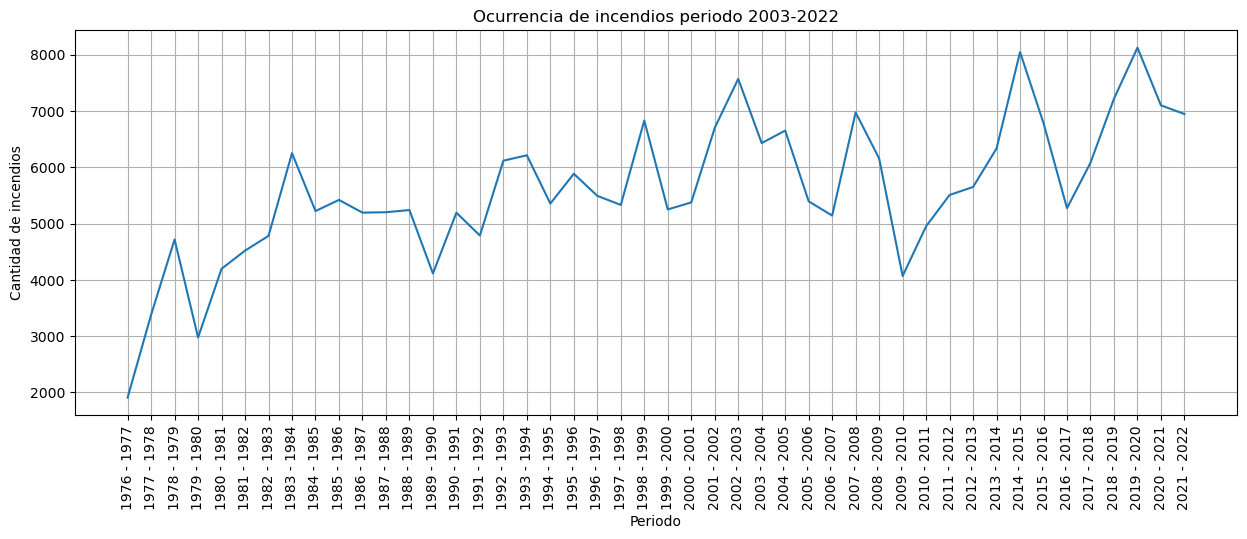

In [17]:
# Graficamos la ocurrencia de incendios periodo 2014-2022
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_ocurrencia_incendios, x="PERIODO", y="TOTAL")
plt.title("Ocurrencia de incendios periodo 2003-2022")
plt.xlabel("Periodo")
plt.ylabel("Cantidad de incendios")
plt.grid()
plt.xticks(rotation=90)
plt.show()


### Análisis Ocurrencia de Incendios 🔥🌲

Podemos apreciar que los incendios han ido en aumento durante este último tiempo, por lo que analizaremos más detalladamente los daños generados por estos incendios.

In [18]:
# Analizamos los daños por incendios en el país
df_danos_superficie.head()

,PERIODO,XV,I,II,III,IV,V,RM,VI,VII,XVI,VIII,IX,XIV,X,XI,XII,TOTAL
0,1976 - 1977,0.0,0.0,0.0,0.0,148.0,17264.0,613.0,4066.0,1263.0,0.0,2503.0,391.0,0.0,208.0,2.0,0.0,26458.0
1,1977 - 1978,0.0,0.0,0.0,0.0,43.0,1179.0,1664.0,2926.0,6604.0,0.0,9152.0,4740.0,0.0,1668.0,1006.0,981.0,29963.0
2,1978 - 1979,0.0,0.0,0.0,0.0,223.0,1763.0,2336.0,805.0,2401.0,0.0,9515.0,30365.0,0.0,24199.0,743.0,3865.0,76215.0
3,1979 - 1980,0.0,0.0,0.0,0.0,148.0,2237.0,1782.0,6325.0,3552.0,0.0,4560.0,2112.0,0.0,1493.0,243.0,83.0,22535.0
4,1980 - 1981,0.0,0.0,0.0,7.0,129.0,7345.0,2835.0,3491.0,4661.0,0.0,4373.0,1552.0,0.0,1042.0,6262.0,359.0,32056.0


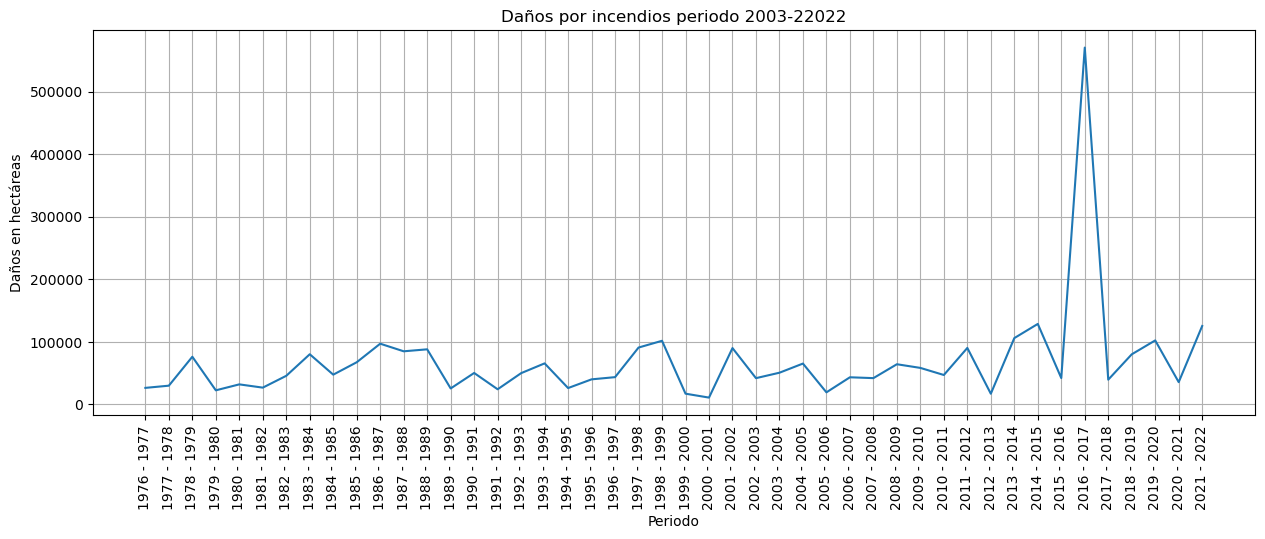

In [19]:
# Graficamos los daños por incendios periodo 2014-2022
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_danos_superficie, x="PERIODO", y="TOTAL")
plt.title("Daños por incendios periodo 2003-22022")
plt.xlabel("Periodo")
plt.ylabel("Daños en hectáreas")
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [20]:
df_danos_superficie[df_danos_superficie["TOTAL"] == df_danos_superficie["TOTAL"].max()]

,PERIODO,XV,I,II,III,IV,V,RM,VI,VII,XVI,VIII,IX,XIV,X,XI,XII,TOTAL
40,2016 - 2017,0.5,0.0,0.0,42.24,3639.83,27118.14,53235.73,105542.93,252556.1,0.0,119409.11,8361.48,94.5,127.3,7.54,61.99,570197.0


### Análisis de Daños por Incendios 🔥🌲

Como podemos apreciar, a pesar de existir una ocurrencia de incencios muy baja entre los años 2015-2018, los daños generados por estos incendios son muy altos, por lo que podemos concluir que los incendios que ocurrieron en estos años fueron de gran magnitud. Más específicamente, podemos ver que el año 2017 fue el año con mayor cantidad de incendios y con mayor daño generado por estos, siendo las regiones más afectadas la región del Maule y la región de O'Higgins, junto con la región del Biobío, por lo que éstos serán los focos de nuestro análisis.

### Análisis de Causas de Incendios 🔥🌲

Antes de analizar los incendios en las regiones de O'Higgins, Maule y Biobío, analizaremos las causas de los incendios en Chile, para así poder entender mejor el contexto de los incendios en estas regiones.

In [21]:
df_causas_incendios.head()

,AÑO,ACCIDENTALES,INTENCIONALES,NATURALES,DESCONOCIDAS
0,2003,3820,1714,4,2034
1,2004,3070,1190,23,2147
2,2005,3192,1763,18,1680
3,2006,3258,1741,6,391
4,2007,3286,1463,14,380


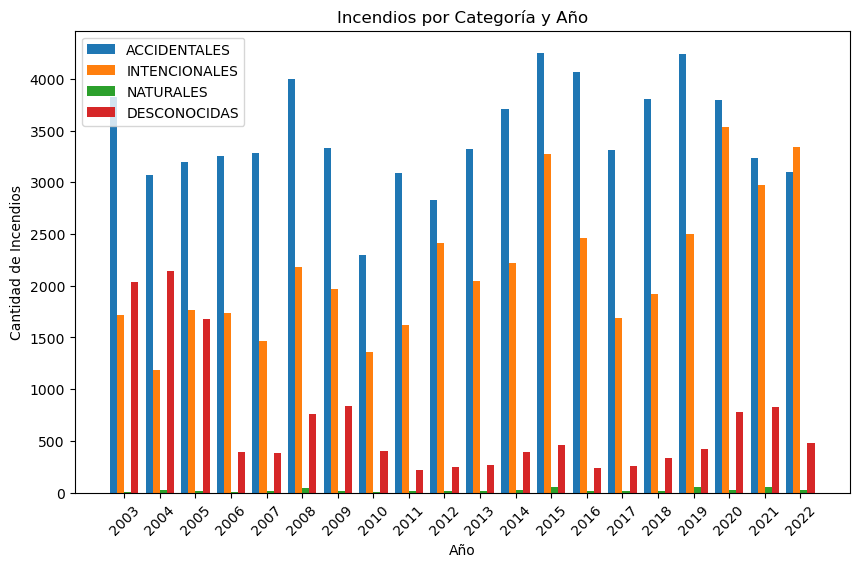

In [22]:
# Graficar los datos
fig, ax = plt.subplots(figsize=(10, 6))

# Barra para cada categoría
bar_width = 0.2
bar_positions = range(len(df_causas_incendios['AÑO']))

# Barra para ACCIDENTALES
plt.bar(bar_positions, df_causas_incendios['ACCIDENTALES'], width=bar_width, label='ACCIDENTALES')

# Barra para INTENCIONALES
plt.bar([p + bar_width for p in bar_positions], df_causas_incendios['INTENCIONALES'], width=bar_width, label='INTENCIONALES')

# Barra para NATURALES
plt.bar([p + 2 * bar_width for p in bar_positions], df_causas_incendios['NATURALES'], width=bar_width, label='NATURALES')

# Barra para DESCONOCIDAS
plt.bar([p + 3 * bar_width for p in bar_positions], df_causas_incendios['DESCONOCIDAS'], width=bar_width, label='DESCONOCIDAS')

# Configurar el eje x
plt.xlabel('Año')
plt.xticks([p + 1.5 * bar_width for p in bar_positions], df_causas_incendios['AÑO'])

# Configurar el eje y
plt.ylabel('Cantidad de Incendios')

# Añadir leyenda
plt.legend()

# Añadir título
plt.title('Incendios por Categoría y Año')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [23]:
df_causas_incendios[df_causas_incendios["ACCIDENTALES"] == df_causas_incendios["ACCIDENTALES"].max()]

,AÑO,ACCIDENTALES,INTENCIONALES,NATURALES,DESCONOCIDAS
12,2015,4252,3273,58,465


Como podemos apreciar, la principal causa de incendios en Chile es de carácter accidental, seguido por la causa intencional, por lo que podemos concluir que la mayoría de los incendios en Chile son causados por el ser humano, algo que pudo haber sido completamente evitable.

## ¿Qué podemos concluir de esto?

Inicialmente, es interesante observar que la mayoría de los incendios provocados fueron atribuibles a actividades humanas, en lugar de causas naturales. Estos datos sugieren que, en muchos casos, la responsabilidad de los incendios recae directamente en las acciones humanas, lo que plantea la cuestión de la relación entre el cambio climático y las actividades humanas, siendo estas últimas un factor determinante en la ocurrencia de incendios.

Durante el año 2017, se registró uno de los eventos de incendio forestal más extensos en términos de superficie (de hecho, fue dada a conocer como una tormenta de fuego). Aunque la cantidad total de incendios puede no haber sido significativa, la magnitud y el impacto medioambiental de este suceso fueron notables. Este incidente destacó por su gran tamaño y consecuencias ambientales significativas.

Centrándonos en el impacto medioambiental, es evidente que eventos de gran amplitud, como el mencionado en 2017, pueden influir en el comportamiento y la diversidad de las aves en la región(es) afectada. La presencia de incendios a gran escala puede alterar tanto el comportamiento como el tipo de aves avistadas en esa área. Esto se debe a que las aves se ven obligadas a emigrar hacia otras zonas para garantizar su supervivencia, o lamentablemente, algunas pueden perecer como resultado del incendio.

En un sentido más general, cada vez que se produce un incendio en una región específica, se observa un impacto directo en la cantidad y diversidad de aves presentes en ese entorno. Este fenómeno subraya la estrecha interconexión entre los incendios forestales y la vida silvestre, evidenciando la necesidad de abordar y gestionar adecuadamente estos eventos para preservar la biodiversidad y el equilibrio ecológico.

### Ahora realizamos la conexion entre incendios y la cantidad de avistamientos con las especies de aves.

Principalmente analizaremos con la cantidad de avistamientos de aves en Chile, y veremos si existe una relación entre la cantidad de avistamientos y la cantidad de incendios o la superficie quemada.

In [24]:
df_danos_mes_2014_2015

,MES,III,IV,V,RM,VI,VII,VIII,IX,XIV,X,XI,XII
0,JULIO,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AGOSTO,0.0,0.0,175.6,0.0,1.5,0.0,1.3,0.3,0.0,0.0,0.0,0.0
2,SEPTIEMBRE,0.0,0.0,295.0,0.0,0.0,0.0,0.1,0.0,0.0,0.8,20.0,0.0
3,OCTUBRE,0.0,0.0,140.5,13.3,20.1,12.6,52.1,18.1,0.5,0.3,134.3,0.0
4,NOVIEMBRE,0.0,15.0,182.1,144.1,89.3,35.8,372.7,75.7,21.9,1.2,0.0,0.0
5,DICIEMBRE,0.0,7.4,1270.7,297.8,125.5,312.5,1272.0,251.3,7.7,19.3,8.2,0.0
6,ENERO,0.0,20.7,341.1,869.9,5082.4,17115.6,4412.3,6082.8,65.7,2365.5,3.3,0.1
7,FEBRERO,0.0,25.7,800.7,221.9,3635.1,4551.3,24544.2,18759.4,390.9,1842.9,66.6,3.1
8,MARZO,0.0,74.0,849.9,687.8,747.3,1281.0,4786.5,20708.2,296.7,652.5,0.2,0.9
9,ABRIL,0.0,0.1,54.4,12.5,394.5,167.3,425.9,76.1,9.8,50.9,0.0,0.0


In [25]:
df_aves_15['comName'].value_counts()

comName
Gray-hooded Sierra Finch    142
Semipalmated Plover          47
Mallard                      41
Semipalmated Sandpiper       39
Common Gallinule             32
                           ... 
Ochre-flanked Tapaculo        1
Common Diving-Petrel          1
Little Penguin                1
Austral Thrush                1
American Redstart             1
Name: count, Length: 368, dtype: int64

In [26]:
df_aves_15['obsDt'] = df_aves_15['obsDt'].astype('datetime64[ns]')
df_aves_15['obsDt'].dt.month.value_counts()

obsDt
10.0    260
2.0     242
11.0    236
3.0     202
4.0     199
12.0    175
1.0     173
9.0     171
5.0     148
7.0     144
8.0     128
6.0     123
Name: count, dtype: int64

In [27]:
dataframes_aves = [df_aves_15, df_aves_16, df_aves_17, df_aves_18, df_aves_19, df_aves_20, df_aves_21, df_aves_22]
dataframes_aves_agrupadas = []
for df_ in dataframes_aves:
    df_['obsDt'] = df_['obsDt'].astype('datetime64[ns]')
    df_['mes'] = df_['obsDt'].dt.month
    df_ = df_.groupby(['comName','region','sciName','mes']).sum('howMany').reset_index().sort_values(by='howMany', ascending=False)
    dataframes_aves_agrupadas.append(df_)


In [28]:
#redistribuimos los dataframes
df_aves_15 = dataframes_aves_agrupadas[0]
df_aves_16 = dataframes_aves_agrupadas[1]
df_aves_17 = dataframes_aves_agrupadas[2]
df_aves_18 = dataframes_aves_agrupadas[3]
df_aves_19 = dataframes_aves_agrupadas[4]
df_aves_20 = dataframes_aves_agrupadas[5]
df_aves_21 = dataframes_aves_agrupadas[6]
df_aves_22 = dataframes_aves_agrupadas[7]

In [29]:
df_aves_15[df_aves_15['sciName'] == 'Enicognathus leptorhynchus']

,comName,region,sciName,mes,howMany,lat,lng,locationPrivate,exoticCategory
1140,Slender-billed Parakeet,Ñuble,Enicognathus leptorhynchus,10.0,1000.0,-36.683361,-72.252110,1,-1
1138,Slender-billed Parakeet,Los Lagos,Enicognathus leptorhynchus,10.0,801.0,-40.628448,-73.117919,0,-1
1136,Slender-billed Parakeet,Los Lagos,Enicognathus leptorhynchus,4.0,500.0,-41.301289,-73.458828,1,-1
1137,Slender-billed Parakeet,Los Lagos,Enicognathus leptorhynchus,9.0,400.0,-40.628448,-73.117919,0,-1
1139,Slender-billed Parakeet,Maule,Enicognathus leptorhynchus,10.0,70.0,-35.753644,-72.032033,1,-1
1135,Slender-billed Parakeet,Bío-Bío,Enicognathus leptorhynchus,11.0,1.0,-37.536318,-72.201737,1,-1


In [30]:
df_aves_17[df_aves_17['sciName'] == 'Enicognathus leptorhynchus']

,comName,region,sciName,mes,howMany,lat,lng,locationPrivate,exoticCategory
1214,Slender-billed Parakeet,Los Lagos,Enicognathus leptorhynchus,10.0,802.0,-40.628448,-73.117919,0,-1
1213,Slender-billed Parakeet,Los Lagos,Enicognathus leptorhynchus,6.0,346.0,-40.628448,-73.117919,0,-1
1212,Slender-billed Parakeet,Los Lagos,Enicognathus leptorhynchus,5.0,299.0,-40.628448,-73.117919,0,-1
1209,Slender-billed Parakeet,Araucanía,Enicognathus leptorhynchus,4.0,165.0,-38.544411,-72.434534,1,-1
1210,Slender-billed Parakeet,Bío-Bío,Enicognathus leptorhynchus,8.0,150.0,-37.571214,-72.593821,1,-1
1208,Slender-billed Parakeet,Araucanía,Enicognathus leptorhynchus,2.0,68.0,-39.282004,-71.969702,1,-1
1215,Slender-billed Parakeet,Región Metropolitana de Santiago,Enicognathus leptorhynchus,7.0,2.0,-33.566948,-70.555401,1,1
1211,Slender-billed Parakeet,Coquimbo,Enicognathus leptorhynchus,12.0,1.0,-33.541717,-70.668794,1,1
1216,Slender-billed Parakeet,Ñuble,Enicognathus leptorhynchus,11.0,0.0,-36.906728,-71.410950,0,-1


In [31]:
df_aves_15['region'].unique()

array(['Los Ríos', 'Los Lagos', 'Arica y Parinacota', 'Valparaíso',
       'Tarapacá', "Libertador General Bernardo O'Higgins", 'Antofagasta',
       'Magallanes', 'Región Metropolitana de Santiago', 'Bío-Bío',
       'Ñuble', 'Maule', 'Coquimbo',
       'Aisén del General Carlos Ibáñez del Campo', 'Atacama',
       'Araucanía', 'Chile'], dtype=object)

#### Espacio para graficos 

### Ploteo por mes y region

In [32]:
#ahora ploteamos por mes
def ploteo_aves_mes(region, mes):
    plt.figure(figsize=(15, 5))
    sns.scatterplot(data=df_aves_15[(df_aves_15['region'] == region) & (df_aves_15['mes'] == mes)].head(10), x="comName", y="howMany", color='red', label='2015')
    plt.xticks(rotation=45)

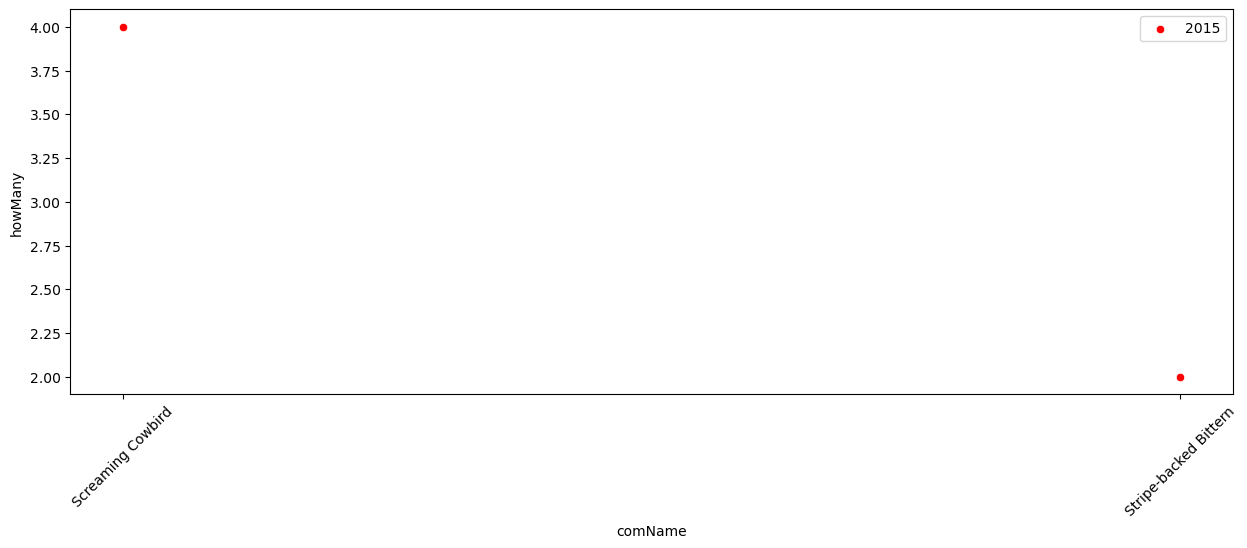

In [33]:
ploteo_aves_mes('Libertador General Bernardo O\'Higgins', 1)

### Ploteo por año

In [34]:
#hacemos scatter plot con todos los dataframes de aves siendo estos desde el 2015 al 2022
#ploteo por años
def ploteo_aves(region):
    plt.figure(figsize=(15, 5))
    sns.scatterplot(data=df_aves_15[df_aves_15['region'] == region].head(10), x="comName", y="howMany", color='red', label='2015')
    sns.scatterplot(data=df_aves_16[df_aves_16['region'] == region].head(10), x="comName", y="howMany", color='blue', label='2016')
    sns.scatterplot(data=df_aves_17[df_aves_17['region'] == region].head(10), x="comName", y="howMany", color='green', label='2017')
    sns.scatterplot(data=df_aves_18[df_aves_18['region'] == region].head(10), x="comName", y="howMany", color='orange', label='2018')
    sns.scatterplot(data=df_aves_19[df_aves_19['region'] == region].head(10), x="comName", y="howMany", color='purple', label='2019')
    sns.scatterplot(data=df_aves_20[df_aves_20['region'] == region].head(10), x="comName", y="howMany", color='black', label='2020')
    sns.scatterplot(data=df_aves_21[df_aves_21['region'] == region].head(10), x="comName", y="howMany", color='cyan', label='2021')
    sns.scatterplot(data=df_aves_22[df_aves_22['region'] == region].head(10), x="comName", y="howMany", color='magenta', label='2022')
    plt.title("Aves más vistas en Chile (Region :" + region + ")")
    plt.xlabel("Aves")
    plt.ylabel("Cantidad de avistamientos")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()

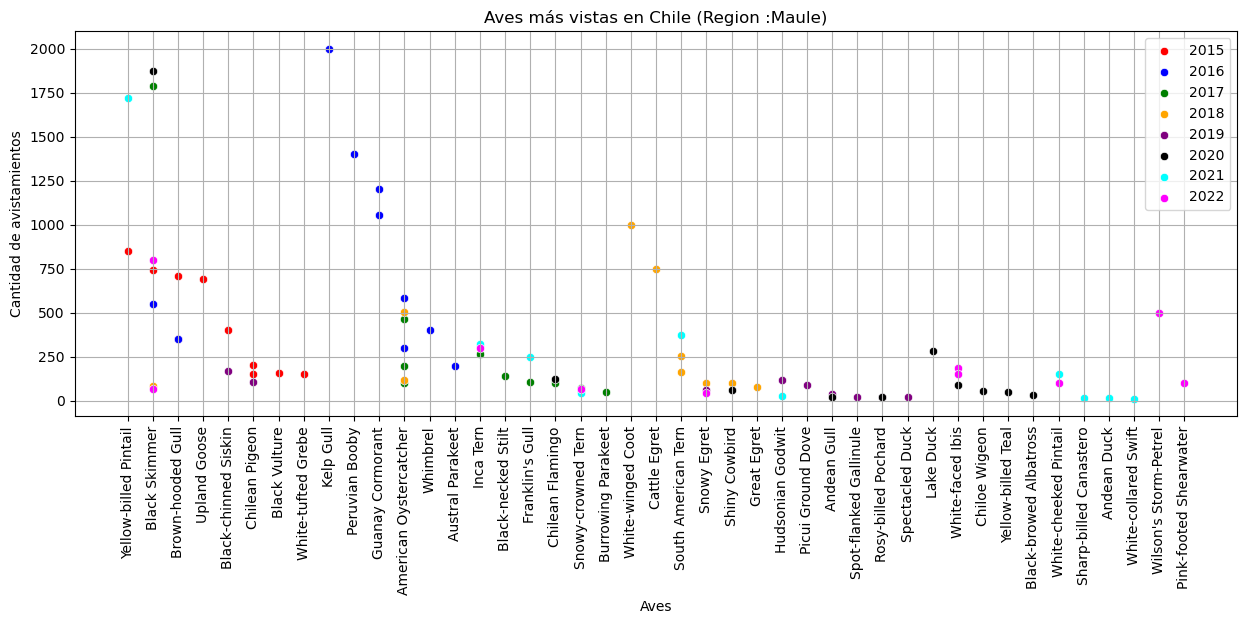

In [35]:
ploteo_aves('Maule')

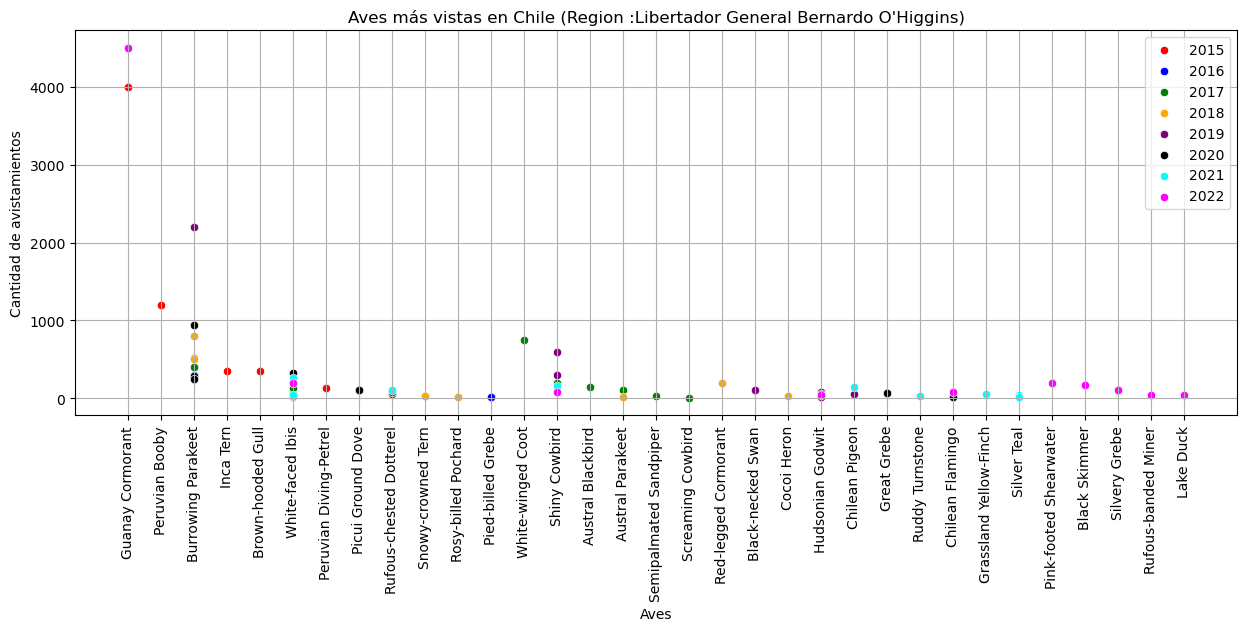

In [36]:
ploteo_aves('Libertador General Bernardo O\'Higgins')

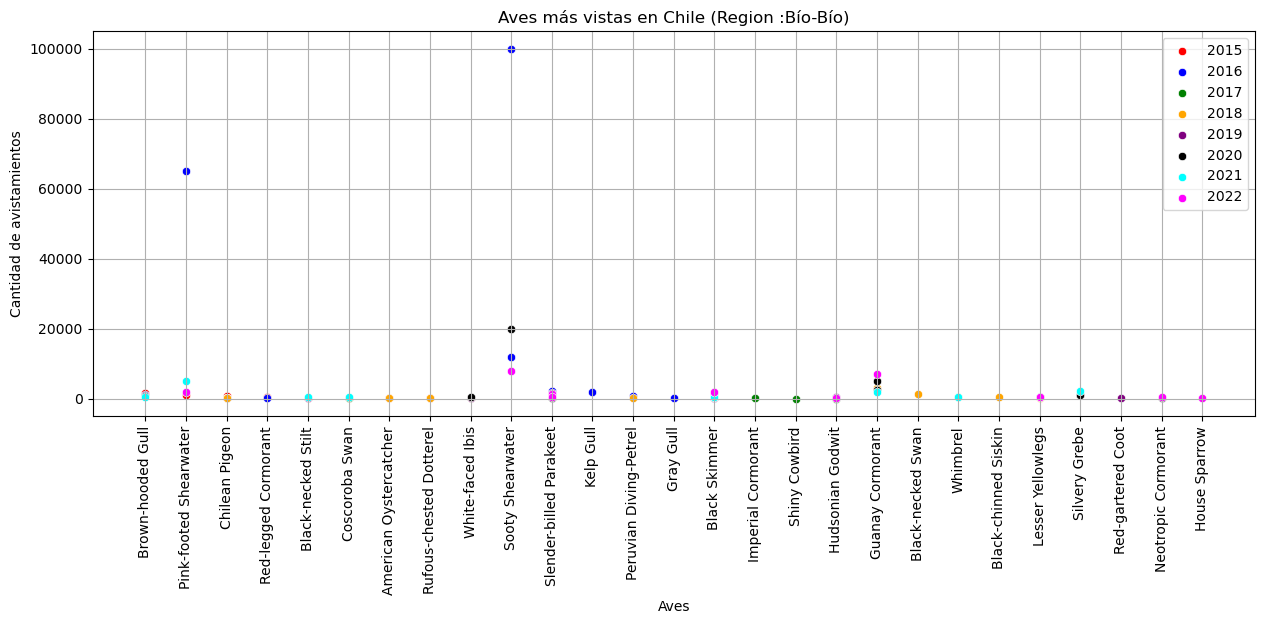

In [37]:
ploteo_aves('Bío-Bío')

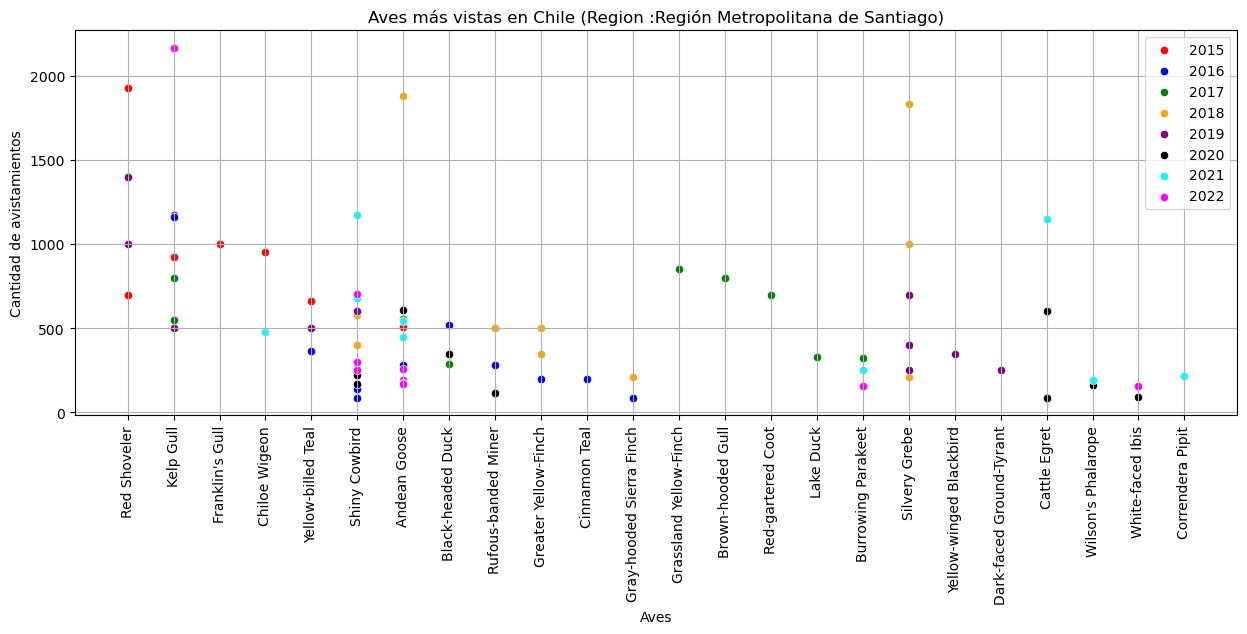

In [38]:
ploteo_aves('Región Metropolitana de Santiago')